<a href="https://colab.research.google.com/github/marquito3012/TFG/blob/main/creating_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
with open("crops_and_labels.pkl", "rb") as f:
    loaded_dic = pickle.load(f)

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.ToTensor(),
])

In [ ]:
import os
import random
from sklearn.model_selection import train_test_split
from PIL import Image

# Crear directorios base para train y test
output_dir = "FacesDataset"
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Divide las imágenes en train y test
image_paths = list(loaded_dic.keys())
train_paths, test_paths = train_test_split(image_paths, test_size=0.2, random_state=42)

# Función para guardar crops
def save_crops(image_dict, output_dir):
    for image_path, data in image_dict.items():
        image_crops = data["crops"]
        image_labels = data["labels"]

        for idx, (crop, label) in enumerate(zip(image_crops, image_labels)):
            label_dir = os.path.join(output_dir, "faces")
            os.makedirs(label_dir, exist_ok=True)

            crop_filename = f"{os.path.basename(image_path)}_crop{idx}.png"
            crop_path = os.path.join(label_dir, crop_filename)

            # Guardar crop como imagen
            crop_image = Image.fromarray(crop)
            crop_image.save(crop_path)

# Crear diccionarios para train y test
train_dict = {path: loaded_dic[path] for path in train_paths}
test_dict = {path: loaded_dic[path] for path in test_paths}

# Guardar crops en las carpetas correspondientes
save_crops(train_dict, train_dir)
save_crops(test_dict, test_dir)


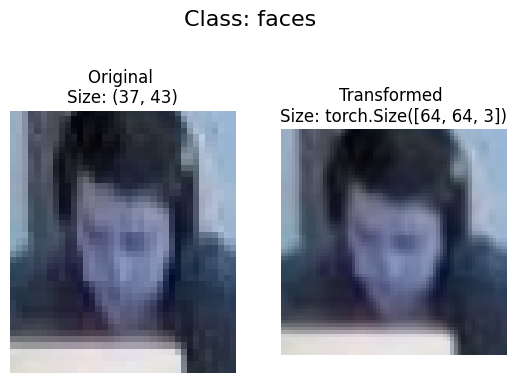

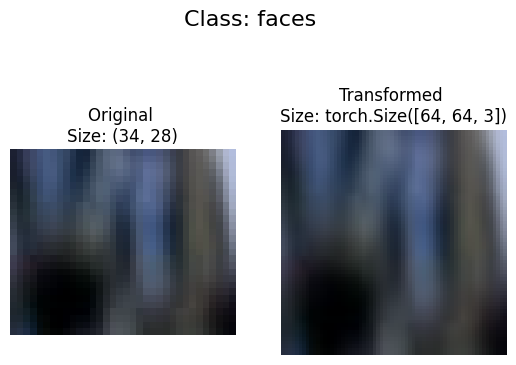

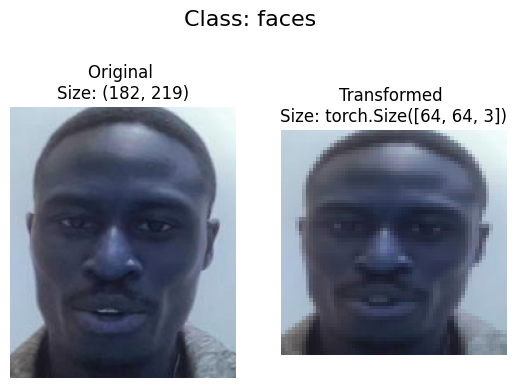

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
image_paths = Path("FacesDataset")
image_path_list = list(image_paths.glob("test/*/*.png"))
def plot_transformed_images(image_paths, transform, n=3, seed=10):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [ ]:
# Use ImageFolder to create dataset(s)

train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 433
    Root location: FacesDataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 156
    Root location: FacesDataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['faces']

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'faces': 0}

In [ ]:
len(train_data), len(test_data)

(433, 156)